In [40]:
#Importing all the libraries we'll need
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [41]:
#Importing all of our datasets in variables from yaml file paths
with open('../config.yaml', 'r') as file:
    data_path = yaml.safe_load(file)

df_all = pd.read_csv(data_path['clean_footprint']['file'])
df_test = pd.read_csv(data_path['clean_footprint_test']['file'])
df_control =  pd.read_csv(data_path['clean_footprint_control']['file'])
df_demo = pd.read_csv(data_path['clean_user_profile']['file'])
big_df = pd.read_csv(data_path['clean_all_combined']['file'])

In [42]:
#Display descriptive statistics
df_demo.describe()

,client_id,tenure_mth,age,num_accounts,bal,calls_6_mth,logons_6_mth
count,7.060900e+04,70609.000000,70609.000000,70609.000000,7.060900e+04,70609.000000,70609.000000
mean,5.004992e+06,150.656460,46.180388,2.255477,1.474286e+05,3.382402,5.566627
std,2.877278e+06,82.081975,15.598733,0.534956,3.014811e+05,2.236365,2.353066
min,1.690000e+02,33.000000,13.000000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,82.000000,32.000000,2.000000,3.735012e+04,1.000000,4.000000
50%,5.016978e+06,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,192.000000,59.000000,2.000000,1.375217e+05,6.000000,7.000000
max,9.999839e+06,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


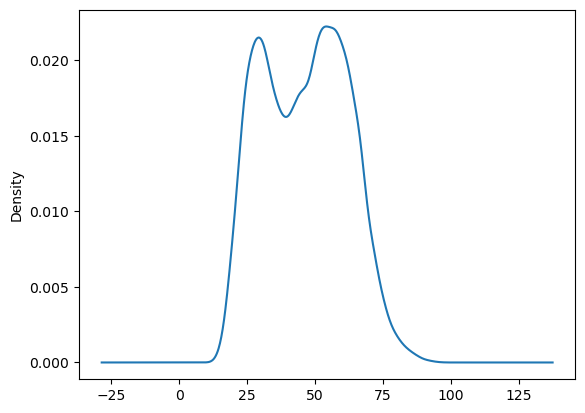

In [43]:
#Plotting age density of all the clients in the experiment
df_demo.age.plot(kind='kde', ylabel='Age Density')
plt.savefig('../figures/age.png', transparent=True)

In [44]:
#Separating user profile datasets in two : one for each experiment group
test_clients = df_test['client_id'].unique()
control_clients = df_control['client_id'].unique()

control_demo = df_demo[df_demo['client_id'].isin(control_clients)]
test_demo = df_demo[df_demo['client_id'].isin(test_clients)]

In [45]:
#Age descriptive statistics for test group
test_demo['age'].describe()

count    26968.000000
mean        46.885012
std         15.522741
min         17.000000
25%         33.000000
50%         47.000000
75%         59.000000
max         96.000000
Name: age, dtype: float64

In [46]:
#Age descriptive statistics for control group
control_demo['age'].describe()

count    23532.000000
mean        47.256629
std         15.527908
min         17.000000
25%         33.000000
50%         48.000000
75%         60.000000
max         96.000000
Name: age, dtype: float64

In [47]:
#Creating 2 datasets containing only people who completed the process for each group
test_completed_clients = df_test[df_test['process_step'] == 'validate']['client_id']
control_completed_clients = df_control[df_control['process_step'] == 'validate']['client_id']

In [48]:
#Checking age descriptive statistics for people who completed the process in test group
completed_test_demo = df_demo[df_demo['client_id'].isin(test_completed_clients)]
completed_test_demo['age'].describe()

count    18687.000000
mean        46.165195
std         15.361004
min         17.000000
25%         32.000000
50%         47.000000
75%         59.000000
max         95.000000
Name: age, dtype: float64

In [49]:
#Checking age descriptive statistics for people who completed the process in control group
completed_control_demo = df_demo[df_demo['client_id'].isin(control_completed_clients)]
completed_control_demo['age'].describe()

count    15434.000000
mean        46.531100
std         15.174788
min         17.000000
25%         33.000000
50%         47.000000
75%         59.000000
max         93.000000
Name: age, dtype: float64

In [50]:
#Creating a function to check descriptive statistics of both groups for people who completed the process and the ones who did not
def describe_group(group):
    if group=='test':
        test_completed_clients = df_test[df_test['process_step'] == 'validate']['client_id']
        uncompleted_test_demo = df_demo[~df_demo['client_id'].isin(test_completed_clients) & df_demo['client_id'].isin(df_test['client_id'])]
        print('Uncompleted process')
        print(uncompleted_test_demo.describe())

        completed_test_demo = df_demo[df_demo['client_id'].isin(test_completed_clients)]
        print('Completed process')
        print(completed_test_demo.describe())

        return uncompleted_test_demo, completed_test_demo
    
    elif group=='control':
        control_completed_clients = df_control[df_control['process_step'] == 'validate']['client_id']
        uncompleted_control_demo = df_demo[~df_demo['client_id'].isin(control_completed_clients) & df_demo['client_id'].isin(df_control['client_id'])]
        print('Uncompleted process')
        print(uncompleted_control_demo.describe())

        completed_control_demo = df_demo[df_demo['client_id'].isin(control_completed_clients)]
        print('Completed process')
        print(completed_control_demo.describe())

        return uncompleted_control_demo, completed_control_demo
    else:
        print('Not a known group. Only select test or control group.')
        return 0

In [51]:
#Using function to display descriptive stats and comparison
_, _ = describe_group('test')

Uncompleted process
          client_id   tenure_mth          age  num_accounts           bal  \
count  8.281000e+03  8281.000000  8281.000000   8281.000000  8.281000e+03   
mean   5.026443e+06   150.927786    48.509359      2.204202  1.423879e+05   
std    2.886646e+06    81.326184    15.762264      0.482757  2.907422e+05   
min    9.340000e+02    33.000000    18.000000      2.000000  2.378949e+04   
25%    2.541450e+06    82.000000    35.000000      2.000000  3.984525e+04   
50%    5.002894e+06   139.000000    50.000000      2.000000  6.501880e+04   
75%    7.550317e+06   191.000000    61.000000      2.000000  1.354481e+05   
max    9.999832e+06   669.000000    96.000000      7.000000  8.986420e+06   

       calls_6_mth  logons_6_mth  
count  8281.000000   8281.000000  
mean      2.933945      5.983939  
std       2.194494      2.177755  
min       0.000000      3.000000  
25%       1.000000      4.000000  
50%       3.000000      6.000000  
75%       5.000000      8.000000  
max   

In [52]:
#Using function to display descriptive stats and comparison
_, _ = describe_group('control')

Uncompleted process
          client_id   tenure_mth          age  num_accounts           bal  \
count  8.098000e+03  8098.000000  8098.000000   8098.000000  8.098000e+03   
mean   4.982628e+06   152.131514    48.639417      2.215979  1.436921e+05   
std    2.887701e+06    81.720331    16.090200      0.494911  2.922477e+05   
min    1.028000e+03    33.000000    18.000000      2.000000  2.378986e+04   
25%    2.473338e+06    82.000000    34.000000      2.000000  4.016560e+04   
50%    4.990374e+06   141.000000    50.000000      2.000000  6.567697e+04   
75%    7.437261e+06   193.000000    61.000000      2.000000  1.365757e+05   
max    9.998921e+06   668.000000    96.000000      6.000000  8.292996e+06   

       calls_6_mth  logons_6_mth  
count  8098.000000   8098.000000  
mean      3.043097      6.085947  
std       2.189829      2.178810  
min       0.000000      3.000000  
25%       1.000000      4.000000  
50%       3.000000      6.000000  
75%       5.000000      8.000000  
max   

#### Percentage of visits attaining each process step by variation

Completion rate for the whole process.

In [53]:
#Creating a cross tab containing the number of times each step was done for each group 
crosstab_all = pd.crosstab(df_all["process_step"], df_all["variation"])

#Number of visits per step
control_counts = crosstab_all['control']
test_counts = crosstab_all['test']

#Total number of started processes
control_start = control_counts.iloc[0]
test_start = test_counts.iloc[0]

#Completion rate per step
control_percentages = [count / control_start * 100 for count in control_counts]
test_percentages = [count / test_start * 100 for count in test_counts]

#Displaying the percentage of visits for each step with 100% = the number of visits for the start step
print("Control group :", control_percentages)
print("Test group :", test_percentages)

Control group : [100.0, 62.31725760376408, 54.3732145857839, 47.88060830112586, 36.76903041505629]
Test group : [100.0, 68.64751921238091, 54.87303892056522, 45.851188157382154, 45.54662322484683]


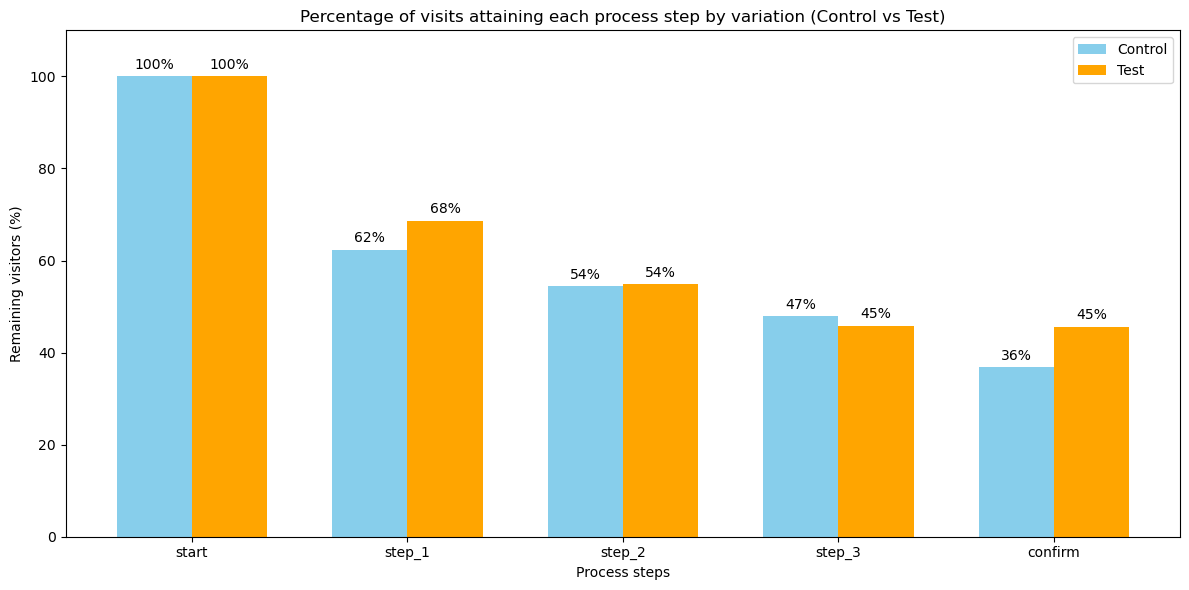

In [54]:
#Plotting the percentages calculated above
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm'] 
x = np.arange(len(steps))  
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))


#Size and personalization 
ax.bar(x - bar_width / 2, control_percentages, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_percentages, bar_width, label='Test', color='orange')

#Add percentages to barplot
for i, (c_perc, t_perc) in enumerate(zip(control_percentages, test_percentages)):
    ax.text(i - bar_width / 2, c_perc + 1, f"{int(c_perc)}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_perc + 1, f"{int(t_perc)}%", ha='center', va='bottom')


ax.set_xticks(x)
ax.set_xticklabels(steps)
ax.set_xlabel('Process steps')
ax.set_ylabel('Remaining visitors (%)')
ax.set_ylim(0, 110)  
ax.set_title('Percentage of visits attaining each process step by variation (Control vs Test)')
ax.legend()

plt.tight_layout()
plt.savefig('../figures/completion_rate.png', transparent=True)
plt.show()

We notice that people seeing the new UX (test group) seem to complete the whole process more often than people with the old UX (control group).

Whole process completion rate: 
 
 - Test group : 45%
 - Control group : 36%

#### Percentage remaining user for each step

Drop rate for each step of the process based only on the previous step.

In [55]:
#Computing the drop rate for each step. This rate is based on people from the previous step only.

control_dropout_rates = []
for i in range(1, len(control_counts)):
    rate = ((control_counts.iloc[i-1] - control_counts.iloc[i]) / control_counts.iloc[i-1]) * 100
    control_dropout_rates.append(rate)

test_dropout_rates = []
for i in range(1, len(test_counts)):
    rate = ((test_counts.iloc[i-1] - test_counts.iloc[i]) / test_counts.iloc[i-1]) * 100
    test_dropout_rates.append(rate)

steps_dropout = steps[1:]  

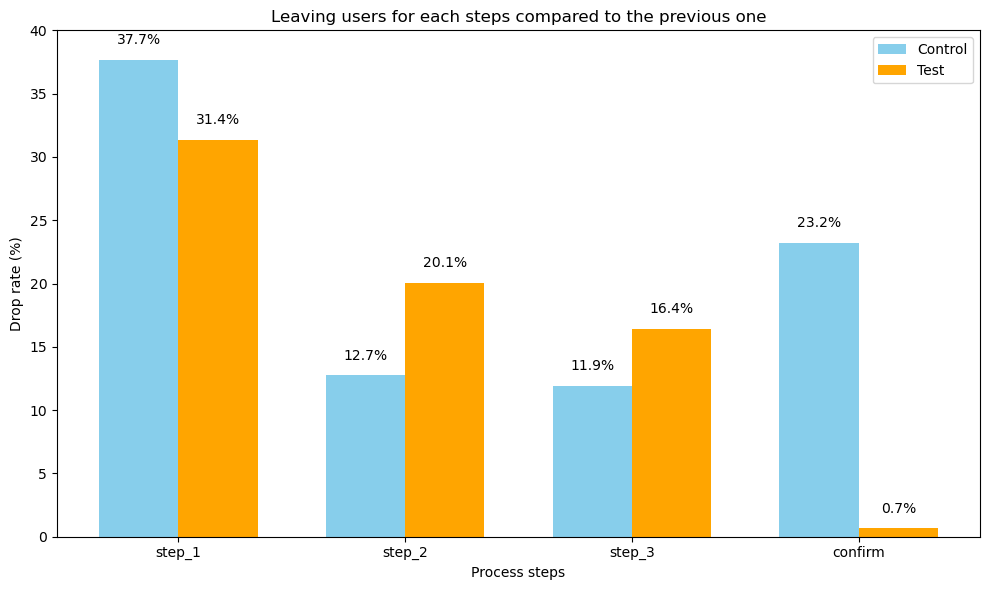

In [56]:
#Plotting the drop rates calculated above
x = np.arange(len(steps_dropout)) 
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x - bar_width / 2, control_dropout_rates, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_dropout_rates, bar_width, label='Test', color='orange')


for i, (c_rate, t_rate) in enumerate(zip(control_dropout_rates, test_dropout_rates)):
    ax.text(i - bar_width / 2, c_rate + 1, f"{c_rate:.1f}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_rate + 1, f"{t_rate:.1f}%", ha='center', va='bottom')


ax.set_xticks(x)
ax.set_xticklabels(steps_dropout)
ax.set_ylim(0, 40)  
ax.set_xlabel('Process steps')
ax.set_ylabel('Drop rate (%)')
ax.set_title('Leaving users for each steps compared to the previous one')
ax.legend()

plt.tight_layout()
plt.show()

Conclusion : 

The visualization highlights the dropout rates at each step of the funnel for both the Control and Test groups. Key observations include:

Step 1 has the highest dropout rate for both groups, with 37.7% in Control and 31.4% in Test, indicating significant user loss at the initial stage.

Step 2 and step 3 : the control group outperforms the test group, showing lower dropout rates at Step 2 (12.7% vs. 20.1%) and Step 3 (11.9% vs. 16.4%).

The confirm step has almost negligible dropout for test group, indicating that users who reach step 3 are very likely to complete the process. This is where test group outperforms control group the most. (23.2% vs 0.7%)

This suggests that the Test variation improves user retention, particularly in the later steps of the funnel. However, the high dropout at step 1 should be a priority for optimization, and step 2 and step 3 should not be overlooked either.

In [57]:
df_all.head()

,client_id,visitor_id,visit_id,process_step,date_time,date,time,variation
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15,12:57:56,test
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,test
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,test
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,test
4,555,402506806_56087378777,637149525_38041617439_716659,validate,2017-04-15 13:00:34,2017-04-15,13:00:34,test


In [60]:
# Define bins and labels based on quartiles
bins_quartiles = [17, 34.5, 50, 61, 96]
labels_quartiles = ['17-34', '35-50', '51-61', '62-96']

# Create the 'age_group' column using pd.cut
big_df['age_group'] = pd.cut(
    big_df['age'],
    bins=bins_quartiles,
    labels=labels_quartiles,
    right=True,
    include_lowest=True
)
big_df['age_group'].head(10)

0    17-34
1    17-34
2    17-34
3    17-34
4    17-34
5    51-61
6    51-61
7    51-61
8    51-61
9    51-61
Name: age_group, dtype: category
Categories (4, object): ['17-34' < '35-50' < '51-61' < '62-96']

In [61]:
# Create the crosstab using 'age_group' and 'Variation'
crosstab_age = pd.crosstab([big_df["age_group"], big_df["variation"]], big_df['process_step'])
crosstab_age.head()

process_step         start  step_1  step_2  step_3  validate
age_group variation                                         
17-34     control    11596    7564    6991    6062      4597
          test       13614    9706    7624    6441      6840
35-50     control    12307    7872    6994    6019      4830
          test       14574    9948    8016    6690      6945
51-61     control    12135    7445    6605    5810      4464

In [62]:
# Calculate percentages relative to 'start' for each age_group and Variation
crosstab_percentages = crosstab_age.div(crosstab_age['start'], axis=0) * 100
crosstab_percentages = crosstab_percentages.round(2)

# Reset the index for easier manipulation
crosstab_percentages_reset = crosstab_percentages.reset_index()
crosstab_percentages_reset.head()

process_step,age_group,variation,start,step_1,step_2,step_3,validate
0,17-34,control,100.0,65.23,60.29,52.28,39.64
1,17-34,test,100.0,71.29,56.00,47.31,50.24
2,35-50,control,100.0,63.96,56.83,48.91,39.25
3,35-50,test,100.0,68.26,55.00,45.90,47.65
4,51-61,control,100.0,61.35,54.43,47.88,36.79


In [63]:
# Define the funnel steps in order
steps_order = ['start', 'step_1', 'step_2', 'step_3', 'validate']
steps_dropout = steps_order[1:]

# Calculate dropout rates by age group and Variation
dropout_data = []

for index, row in crosstab_percentages_reset.iterrows():
    age_group = row['age_group']
    variation = row['variation']
    for i in range(1, len(steps_order)):
        previous_step = steps_order[i-1]
        current_step = steps_order[i]
        if row[previous_step] == 0:
            rate = 0  # avoid division by zero
        else:
            rate = ((row[previous_step] - row[current_step]) / row[previous_step]) * 100
        # Handling negative rates
        if rate < 0:
            #print(f"Warning: Negative dropout rate for {age_group} - {variation} at step {current_step}. Value: {rate}")
            rate = 0
        dropout_data.append({
            'age_group': age_group,
            'variation': variation,
            'step': current_step,
            'dropout_rate': round(rate, 2)
        })

# Convert to DataFrame
dropout_df = pd.DataFrame(dropout_data)
dropout_df.head()


,age_group,variation,step,dropout_rate
0,17-34,control,step_1,34.77
1,17-34,control,step_2,7.57
2,17-34,control,step_3,13.29
3,17-34,control,validate,24.18
4,17-34,test,step_1,28.71


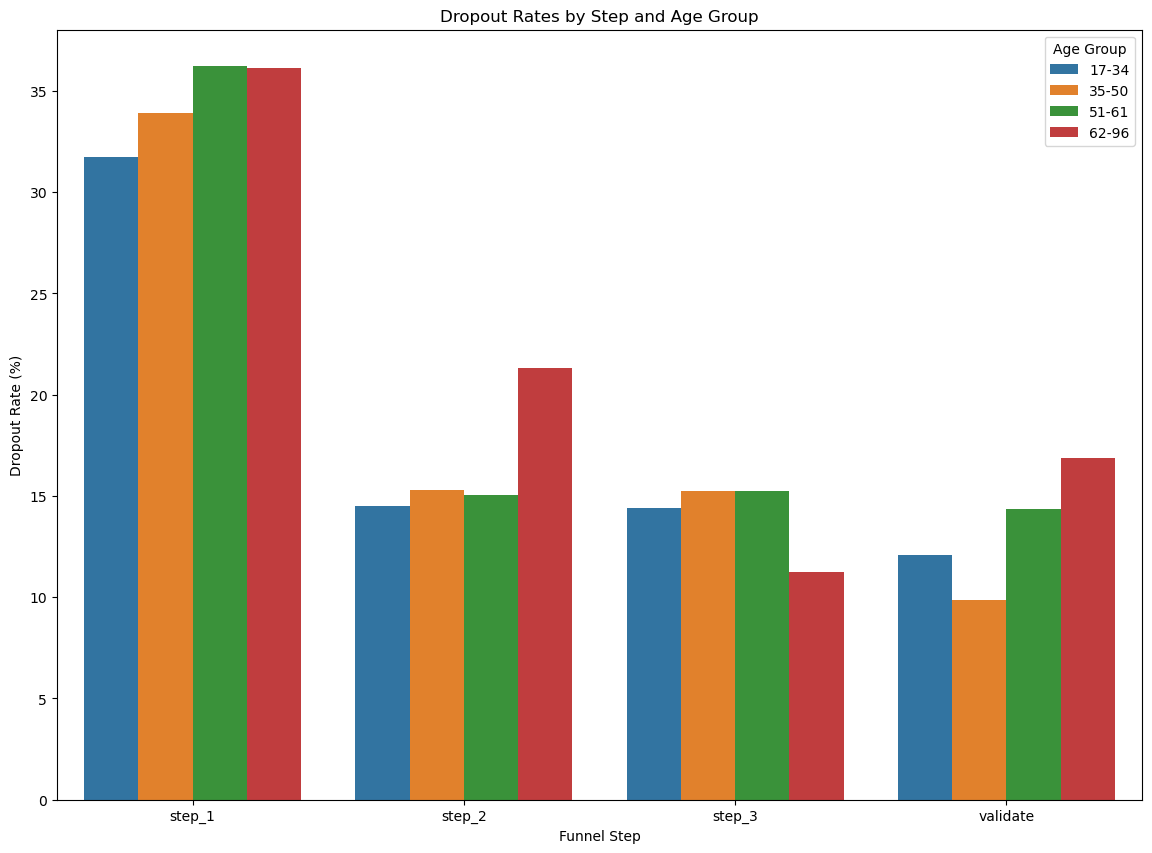

In [64]:
#Plot dropout rates by step and Age Group
plt.figure(figsize=(14, 10))
sns.barplot(
    data=dropout_df,
    x='step',
    y='dropout_rate',
    hue='age_group',
    errorbar=None
)
plt.title('Dropout Rates by Step and Age Group')
plt.xlabel('Funnel Step')
plt.ylabel('Dropout Rate (%)')
plt.legend(title='Age Group')
plt.show()

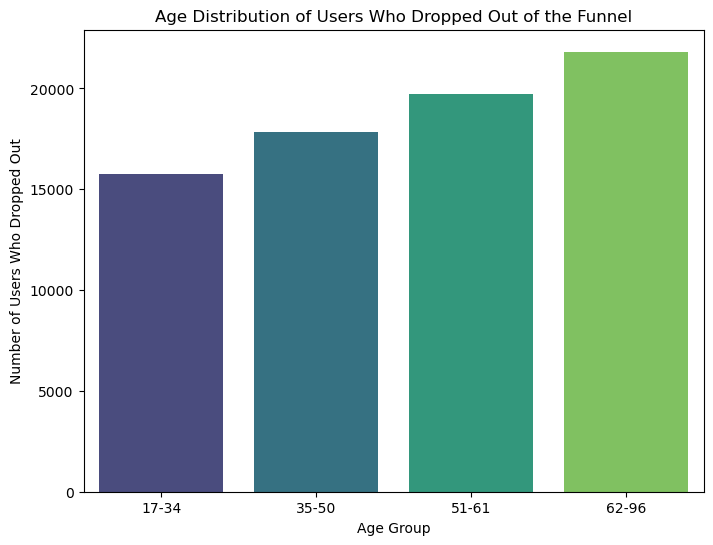

In [66]:
#Identify users who did not reach 'confirm'
users_reached_confirm = big_df[big_df['process_step'] == 'validate']['client_id'].unique()
df_dropout_users = big_df[~big_df['client_id'].isin(users_reached_confirm)]

#Analyze the ages of users who dropped out
dropout_age_distribution = df_dropout_users['age_group'].value_counts().sort_index()

#Visualize the age distribution of users who dropped out
plt.figure(figsize=(8,6))
sns.barplot(x=dropout_age_distribution.index, y=dropout_age_distribution.values, hue=dropout_age_distribution.index, palette='viridis')
plt.title('Age Distribution of Users Who Dropped Out of the Funnel')
plt.xlabel('Age Group')
plt.ylabel('Number of Users Who Dropped Out')
plt.show()


#### Number of sessions to complete the process (reach confirm step)

Mean number of sessions needed to complete the process.

Distribution des sessions (médiane, percentiles).

In [67]:
#Filter data for users who reached "confirm" step (renamed validate here)
df_confirm = df_all[df_all["process_step"] == "validate"]

In [68]:
#Compute number of session per client_id for people who completed the process
sessions_per_user = df_confirm.groupby("client_id")["visit_id"].nunique().reset_index()
sessions_per_user.columns = ["client_id", "session_count"]
sessions_per_user.head()

,client_id,session_count
0,555,1
1,647,1
2,1195,1
3,1197,1
4,1336,2


In [69]:
#Merge data to know which group the client belongs to
df_variation = df_confirm[["client_id", "variation"]].drop_duplicates()
sessions_per_user = sessions_per_user.merge(df_variation, on="client_id")
sessions_per_user.head()

,client_id,session_count,variation
0,555,1,test
1,647,1,test
2,1195,1,control
3,1197,1,control
4,1336,2,test


In [70]:
#Compute descriptive statistics for the number of session needed per group
stats = sessions_per_user.groupby("variation")["session_count"].describe()
stats

,count,mean,std,min,25%,50%,75%,max
variation,,,,,,,,
control,15434.0,1.042374,0.259628,1.0,1.0,1.0,1.0,9.0
test,18687.0,1.166105,0.580481,1.0,1.0,1.0,1.0,11.0


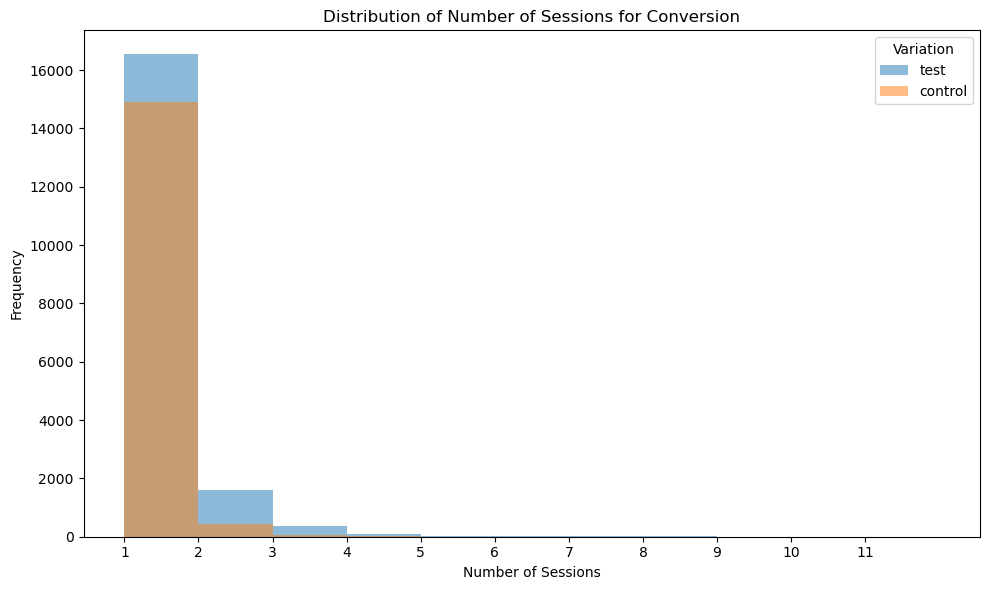

In [71]:
#Create figure with given size
plt.figure(figsize=(10, 6))

#Loop through each variation and plot the histogram
for variation in sessions_per_user["variation"].unique():
    subset = sessions_per_user[sessions_per_user["variation"] == variation]
    
    #Plot histogram for the current variation
    plt.hist(subset["session_count"], bins=range(1, subset["session_count"].max() + 2), 
             alpha=0.5, label=variation, histtype='stepfilled', linestyle='-', linewidth=1)

#Set the title, labels, and legend
plt.title("Distribution of Number of Sessions for Conversion")
plt.xlabel("Number of Sessions")
plt.ylabel("Frequency")
plt.legend(title="Variation")

#Adjust the x-ticks for better readability
plt.xticks(range(1, sessions_per_user["session_count"].max() + 1))

#Show the plot
plt.tight_layout()
plt.savefig('../figures/sessions.png', transparent=True)
plt.show()

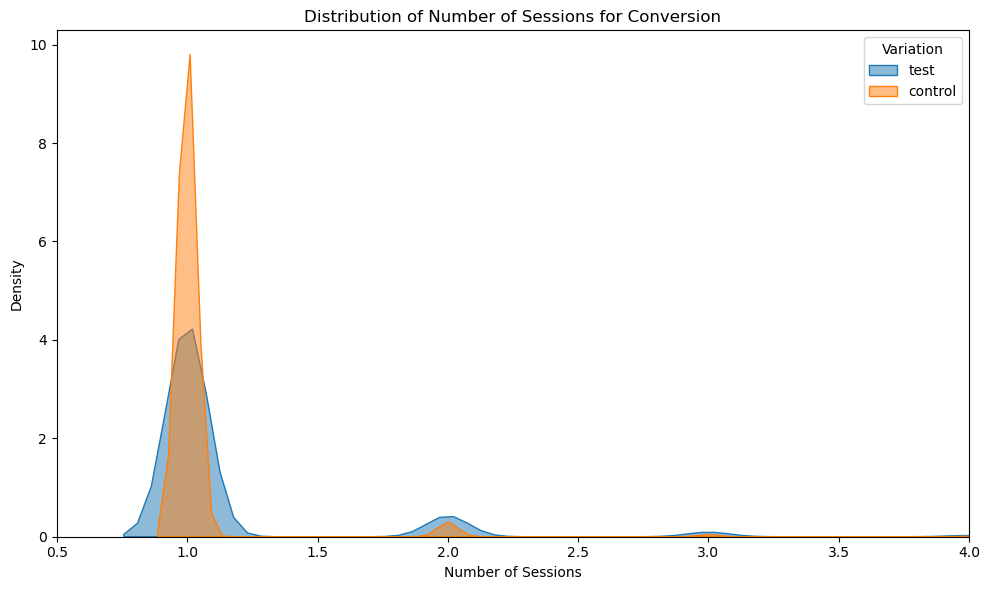

In [72]:
# Create figure with given size
plt.figure(figsize=(10, 6))

# Loop through each variation and plot the KDE plot
for variation in sessions_per_user["variation"].unique():
    subset = sessions_per_user[sessions_per_user["variation"] == variation]
    
    # Plot KDE for the current variation
    sns.kdeplot(subset["session_count"], label=variation, fill=True, alpha=0.5, linewidth=1)

# Set the title, labels, and legend
plt.title("Distribution of Number of Sessions for Conversion")
plt.xlabel("Number of Sessions")
plt.ylabel("Density")
plt.legend(title="Variation")

# Set y-axis limit to 4 for better visibility
plt.xlim(0.5, 4)

# Show the plot
plt.tight_layout()
plt.savefig('../figures/sessions_kde.png', transparent=True)
plt.show()

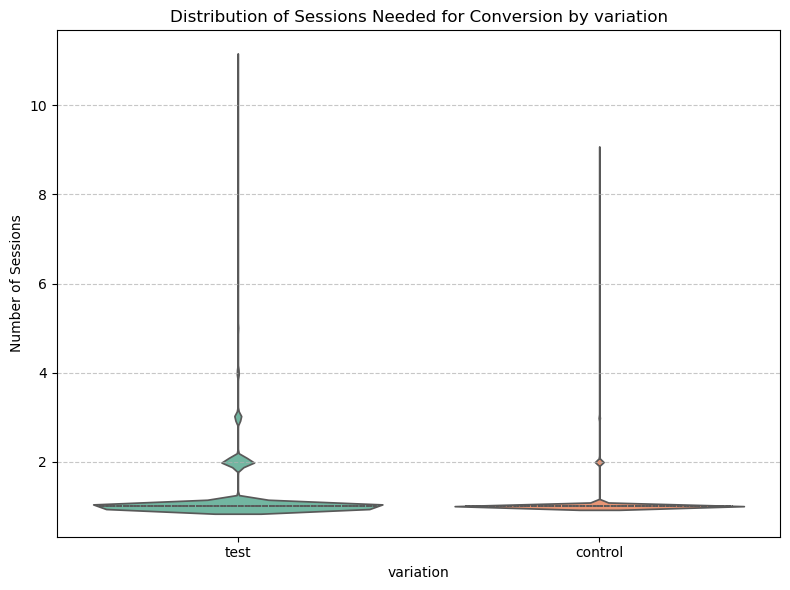

In [73]:
#Plot number of sessions needed for conversion by variation
plt.figure(figsize=(8, 6))

sns.violinplot(data=sessions_per_user, x="variation", y="session_count", hue='variation', palette="Set2", inner="quartile")

plt.title("Distribution of Sessions Needed for Conversion by variation")
plt.xlabel("variation")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Completion rate 

15,428 users in the control group converted whereas 18,682 users in the test group converted.
This suggests that, in terms of total conversions, the test group performed better than the control group.

Average Number of Sessions Needed:

Users in the Control group needed 1.04 sessions on average to convert.
1.16 sessions were needed by users in the Test group.
Control group performs a bit better in this area.



In [74]:
#Create a previous step column containing the previous step of the process
df_all['prev_step'] = df_all.groupby(['client_id', 'visit_id'])['process_step'].shift(1)
#Count the number of transitions from a step to the next one
transitions = df_all.groupby(['prev_step', 'process_step']).size().reset_index(name='count')
#Display it
print(transitions.sort_values(by='count', ascending=False))

   prev_step process_step  count
1      start       step_1  51411
6     step_1       step_2  44471
10    step_2       step_3  40092
0      start        start  39901
13    step_3     validate  33688
5     step_1       step_1  16496
9     step_2       step_2  12131
12    step_3       step_3   8102
14  validate     validate   5348
3      start       step_3     67
7     step_1       step_3     54
2      start       step_2     40
11    step_2     validate     39
8     step_1     validate     13
4      start     validate      9


In [75]:
#Create a dictionary with valid transition order
valid_transitions = {
    'start': ['step_1'],
    'step_1': ['step_2'],
    'step_2': ['step_3'],
    'step_3': ['validate']
}

#Create an is_error column to see if the transition from a step to the next one is valid or not
df_all['is_error'] = ~df_all.apply(lambda row: row['process_step'] in valid_transitions.get(row['prev_step'], []), axis=1)

In [76]:
#Compute error rate to see where people returned to the previous step
error_counts = df_all[df_all['is_error']].groupby(['process_step', 'variation'])['client_id'].nunique()
total_users = df_all.groupby(['process_step', 'variation'])['client_id'].nunique()
error_rate_percentage = (error_counts / total_users * 100).reset_index()
error_rate_percentage.columns = ['process_step', 'variation', 'error_rate_percentage']

#Display percentages
error_rate_percentage

,process_step,variation,error_rate_percentage
0,start,control,100.000000
1,start,test,100.000000
2,step_1,control,20.633188
3,step_1,test,28.495488
4,step_2,control,20.750670
5,step_2,test,18.267589
6,step_3,control,18.183905
7,step_3,test,12.820267
8,validate,control,7.697292
9,validate,test,21.126987


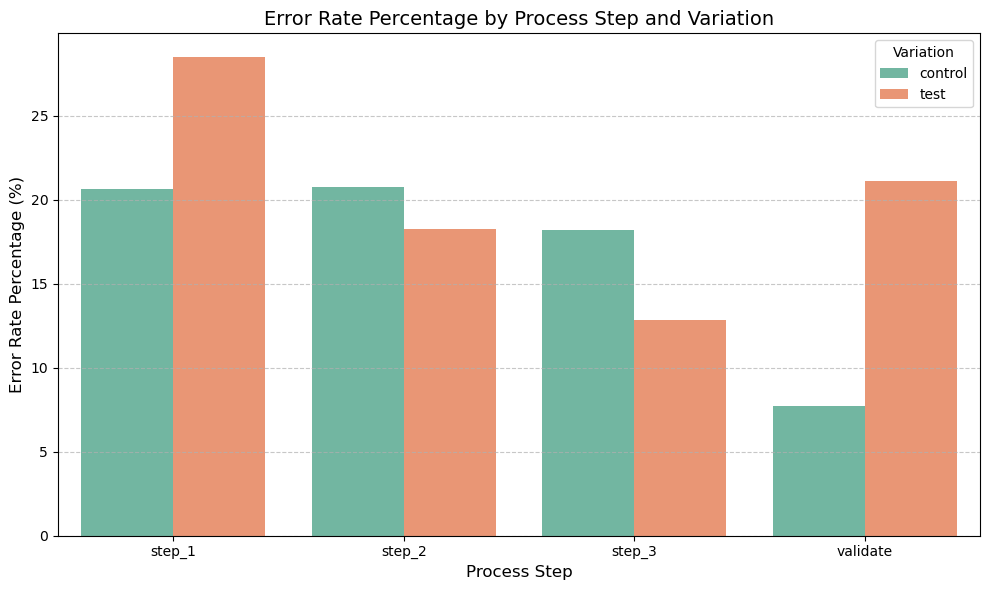

In [77]:
#Plot error rate per step per variation

plt.figure(figsize=(10, 6))
sns.barplot(
    data=error_rate_percentage,
    x="process_step",
    y="error_rate_percentage",
    order=["step_1", "step_2", "step_3", "validate" ],
    hue="variation",
    palette="Set2",
)

# Chart Customizations
plt.title("Error Rate Percentage by Process Step and Variation", fontsize=14)
plt.xlabel("Process Step", fontsize=12)
plt.ylabel("Error Rate Percentage (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Variation")

# Show Plot
plt.tight_layout()
plt.show()

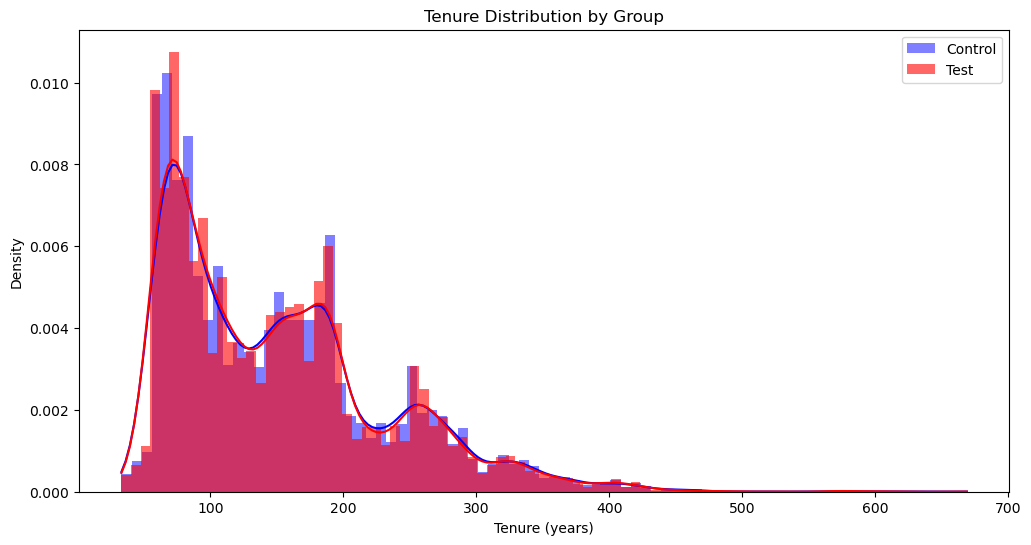

In [78]:
# Tenure Distribution
plt.figure(figsize=(12, 6))
sns.histplot(control_demo['tenure_mth'], color='blue', label='Control', kde=True, stat="density", linewidth=0)
sns.histplot(test_demo['tenure_mth'], color='red', label='Test', kde=True, stat="density", linewidth=0, alpha=0.6)
plt.title('Tenure Distribution by Group')
plt.xlabel('Tenure (years)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
df_demo.head()

,client_id,tenure_mth,age,gender,num_accounts,bal,calls_6_mth,logons_6_mth,variation
0,836976,73,60,U,2,45105.30,6,9,test
1,2304905,94,58,U,2,110860.30,6,9,control
2,1439522,64,32,U,2,52467.79,6,9,test
3,1562045,198,49,M,2,67454.65,3,6,test
4,5126305,145,33,F,2,103671.75,0,3,control


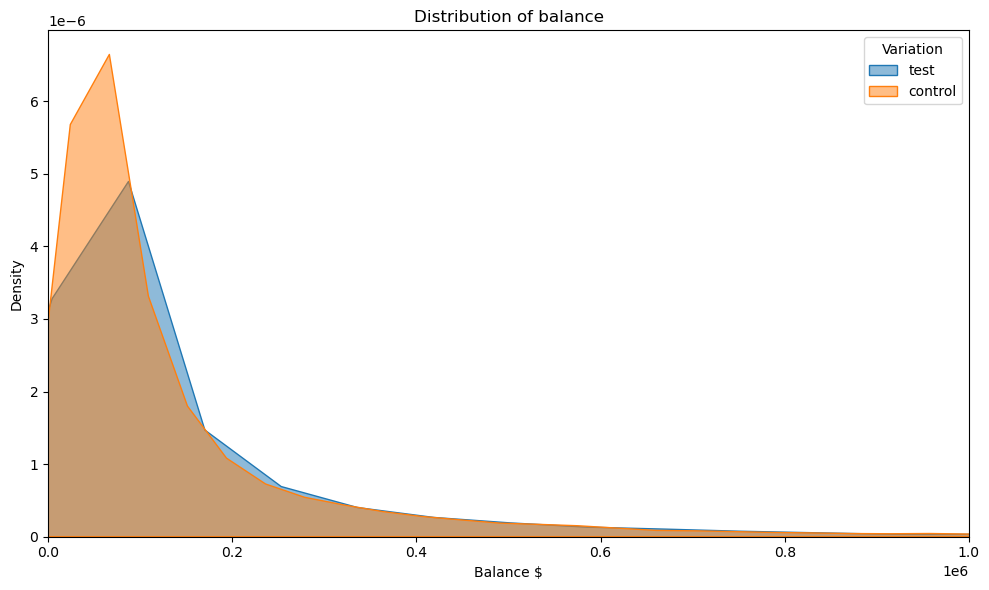

In [94]:
# Create figure with given size
plt.figure(figsize=(10, 6))

# Loop through each variation and plot the KDE plot
for variation in big_df["variation"].unique():
    subset = big_df[big_df["variation"] == variation]
    
    # Plot KDE for the current variation
    sns.kdeplot(subset["bal"], label=variation, fill=True, alpha=0.5, linewidth=1)

# Set the title, labels, and legend
plt.title("Distribution of balance")
plt.xlabel("Balance $")
plt.ylabel("Density")
plt.legend(title="Variation")

# Set y-axis limit to 4 for better visibility
plt.xlim(0, 1e6)

# Show the plot
plt.tight_layout()
plt.savefig('../figures/balance_kde.png', transparent=True)
plt.show()